In [1]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='root',
        database='banking'
    )

    if connection.is_connected():
        db_info = connection.server_info  # <- updated here
        print(f"✅ Connected to MySQL Server version {db_info}")
        cursor = connection.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print(f"✅ You're connected to database: {record[0]}")

except Error as e:
    print(f"❌ Error while connecting to MySQL: {e}")




✅ Connected to MySQL Server version 8.0.23
✅ You're connected to database: banking


In [2]:
query = "select * from banking.customer"


In [3]:
df = pd.read_sql(query,connection)
cursor.close()
connection.close()

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3065918270.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


In [4]:
df.head (5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [6]:
df.shape

(3000, 25)

In [7]:
 ## EDA 

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Descriptive analysis

In [10]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


<Axes: xlabel='Income Band'>

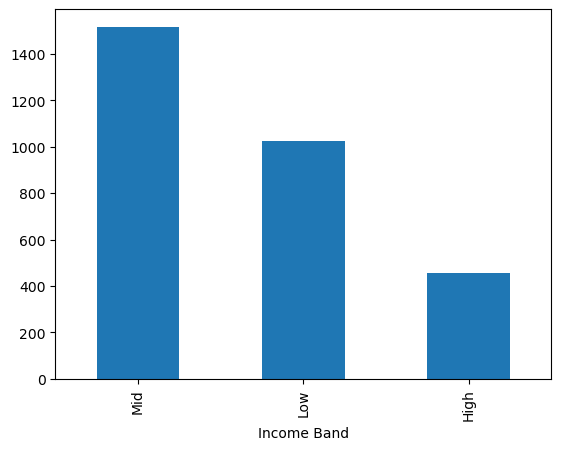

In [11]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Create the 'Income Band' column using pd.cut
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, include_lowest='True')
df['Income Band'].value_counts().plot(kind='bar')

In [12]:
## Univariate analysis for some of the categorical columns

Value Counts for 'Nationality': 


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


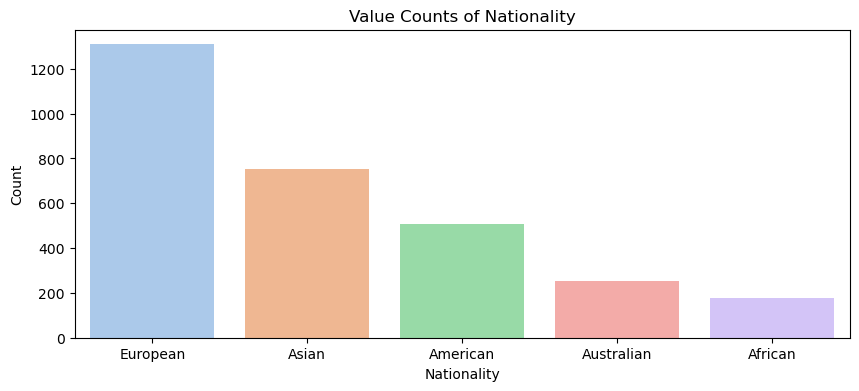

Value Counts for 'Amount of Credit Cards': 


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


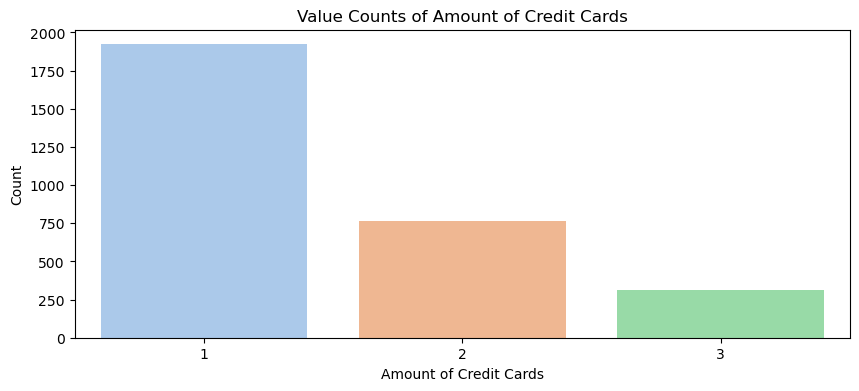

Value Counts for 'GenderId': 


GenderId
2    1512
1    1488
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


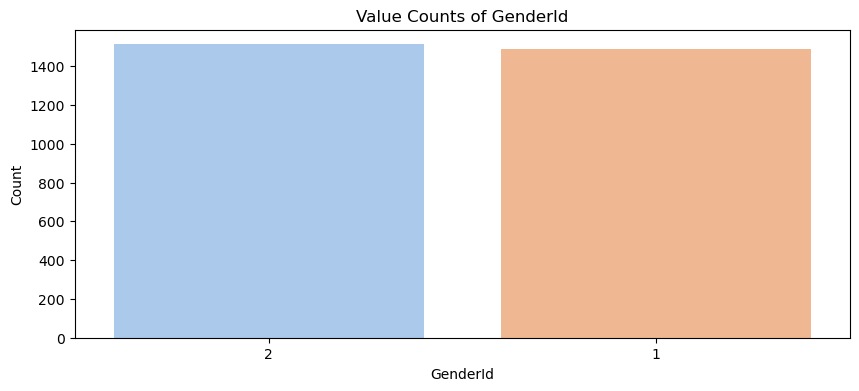

Value Counts for 'IAId': 


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


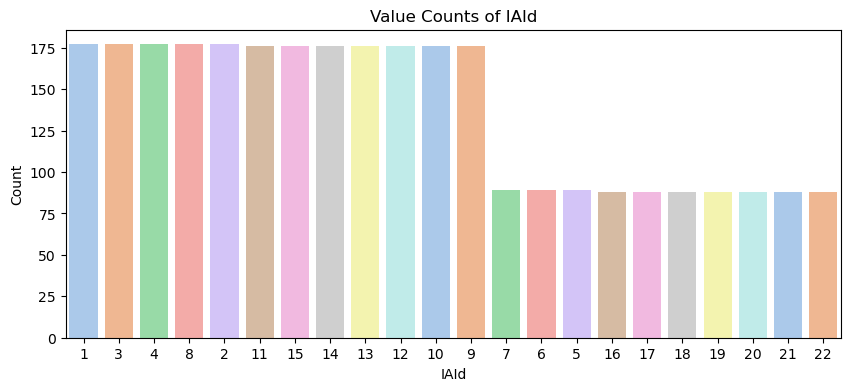

Value Counts for 'Fee Structure': 


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


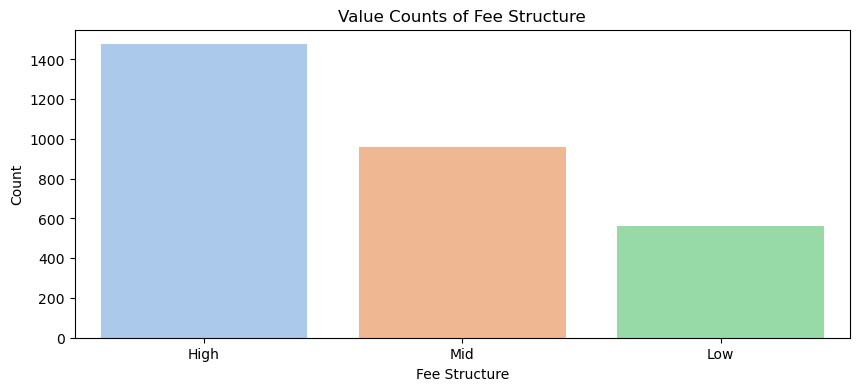

Value Counts for 'Loyalty Classification': 


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


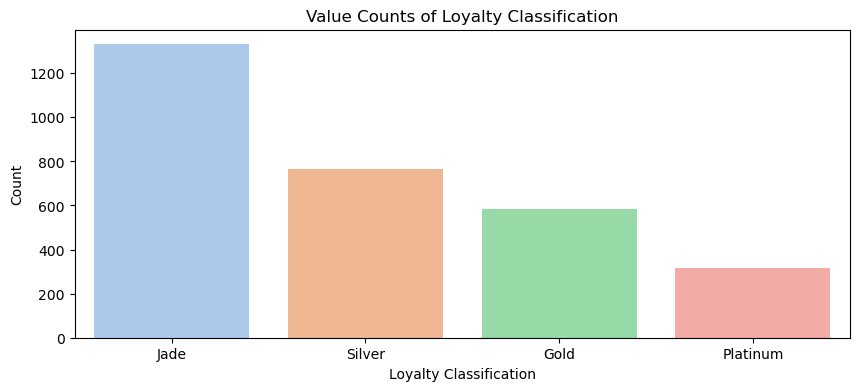

Value Counts for 'Properties Owned': 


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


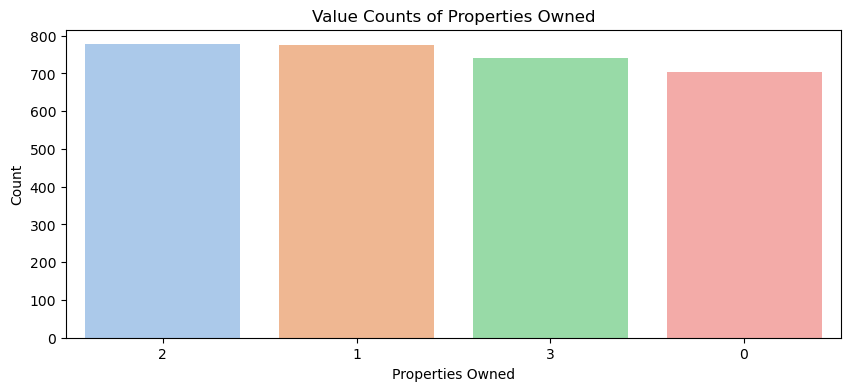

Value Counts for 'Risk Weighting': 


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


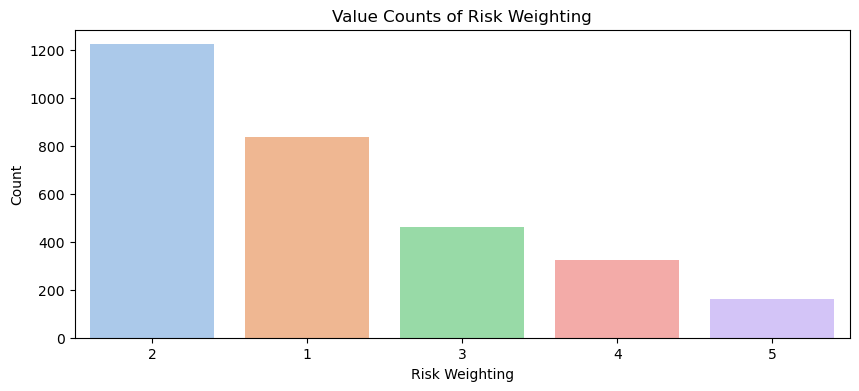

Value Counts for 'BRId': 


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_32104\3257106750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)


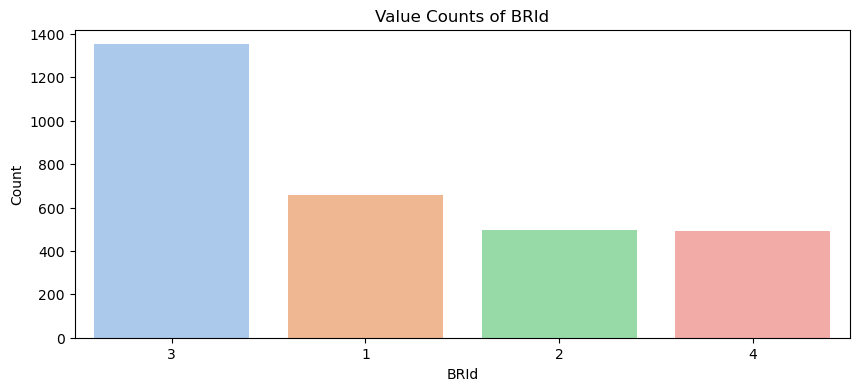

In [13]:
categorical_cols=df[["Nationality","Amount of Credit Cards","GenderId", "IAId","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","BRId"]].columns
for col in categorical_cols:
    print (f"Value Counts for '{col}': ")
    display(df[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df, palette = 'pastel', order=df[col].value_counts().index)
    plt.title(f"Value Counts of {col}")
    
    plt.ylabel("Count")
    plt.show()


In [14]:
## Bivariate Analysis for some of the categorical columns wrt GenderId

Value Counts for 'Nationality': 


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

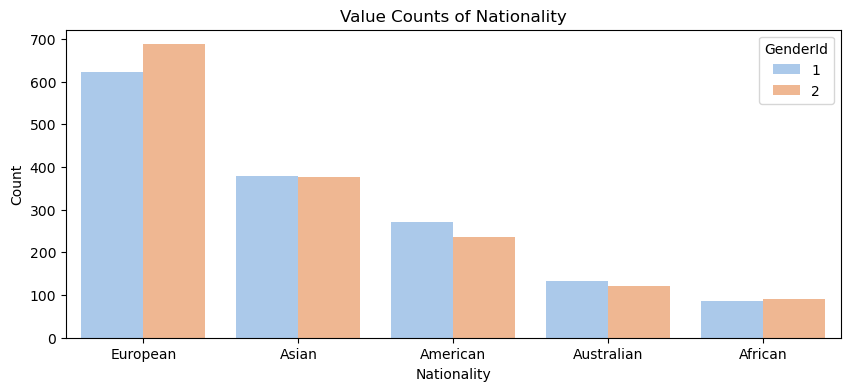

Value Counts for 'Amount of Credit Cards': 


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

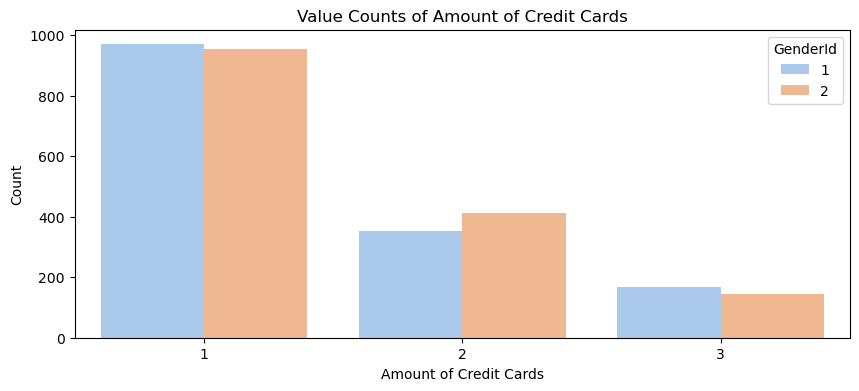

Value Counts for 'GenderId': 


GenderId
2    1512
1    1488
Name: count, dtype: int64

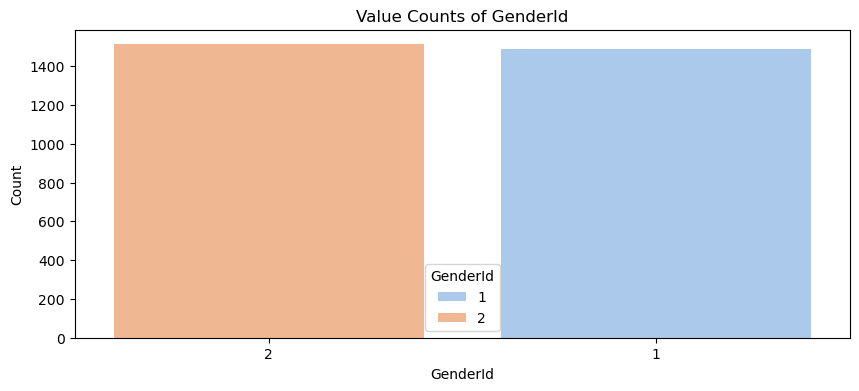

Value Counts for 'IAId': 


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

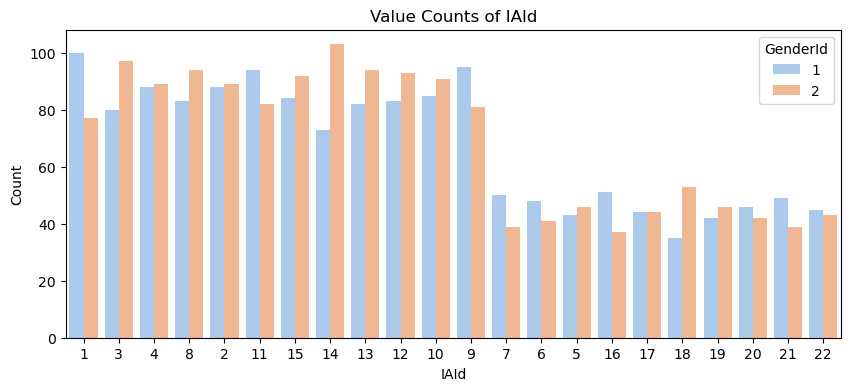

Value Counts for 'Fee Structure': 


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

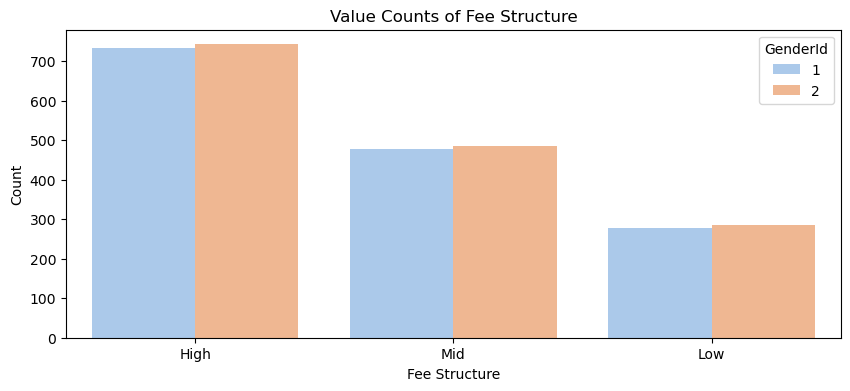

Value Counts for 'Loyalty Classification': 


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

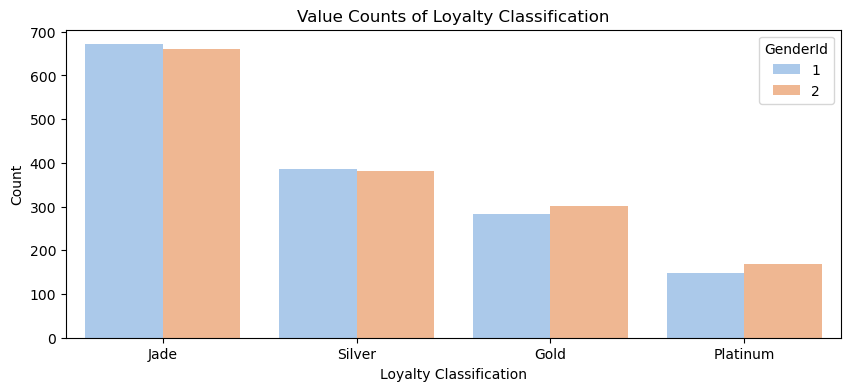

Value Counts for 'Properties Owned': 


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

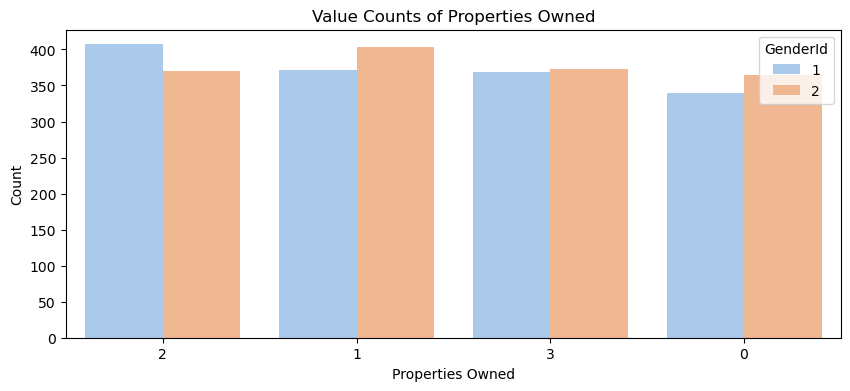

Value Counts for 'Risk Weighting': 


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

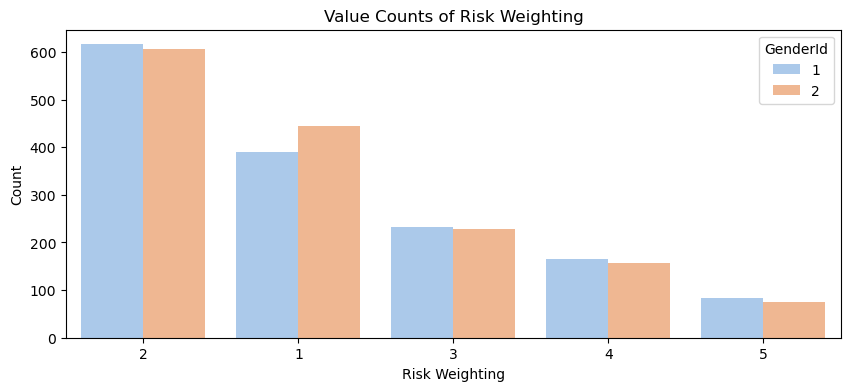

Value Counts for 'BRId': 


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

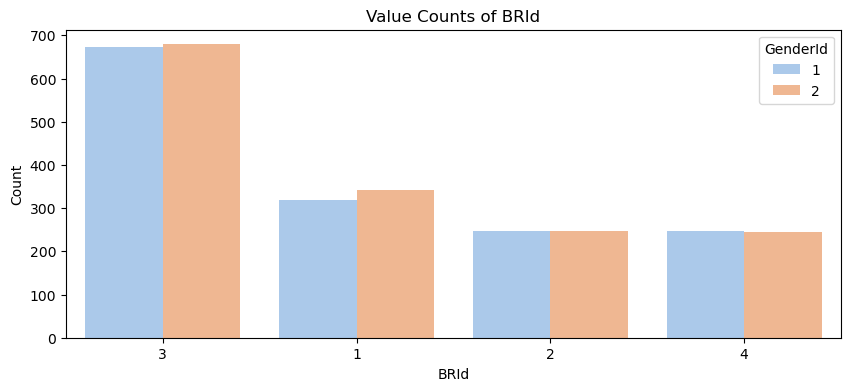

In [15]:
categorical_cols=df[["Nationality","Amount of Credit Cards","GenderId", "IAId","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","BRId"]].columns
for col in categorical_cols:
    print (f"Value Counts for '{col}': ")
    display(df[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue = 'GenderId', palette = 'pastel', data=df, order=df[col].value_counts().index)
    plt.title(f"Value Counts of {col}")
    
    plt.ylabel("Count")
    plt.show()


In [16]:
##Univariate Analysis for Numerical columns

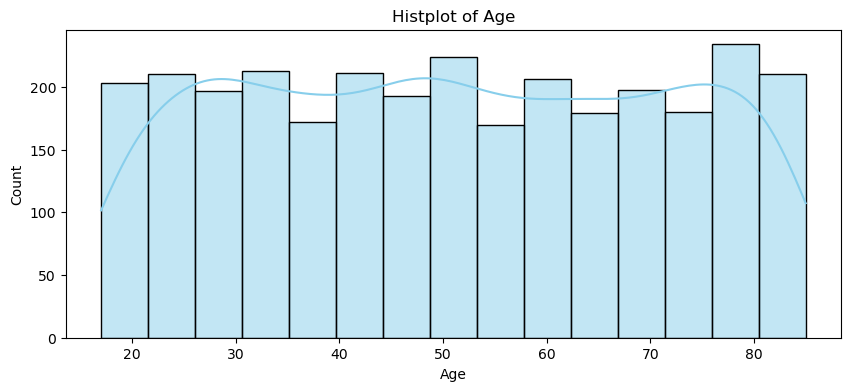

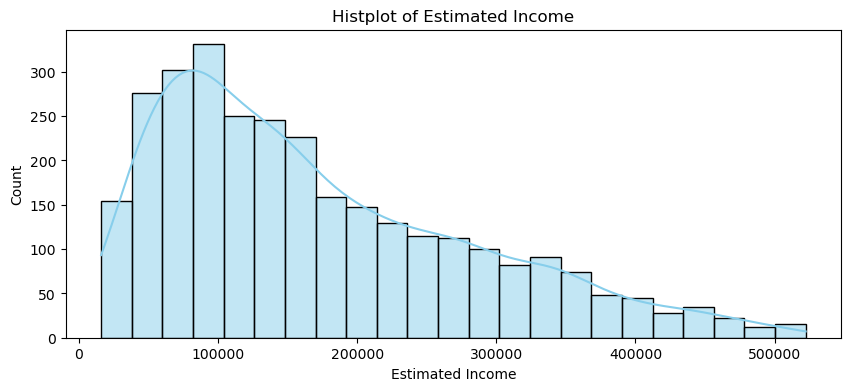

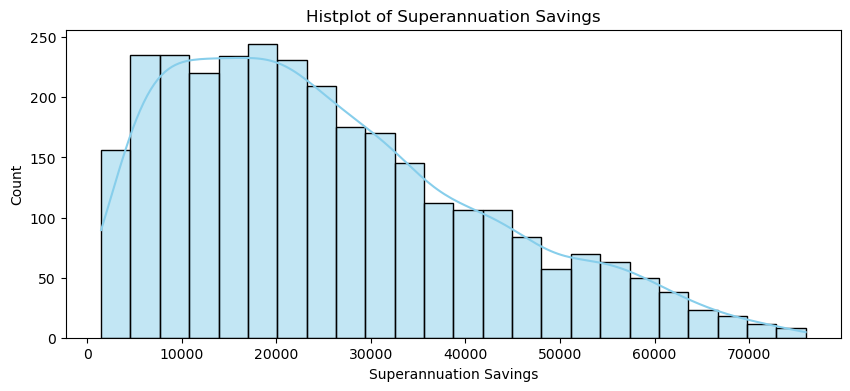

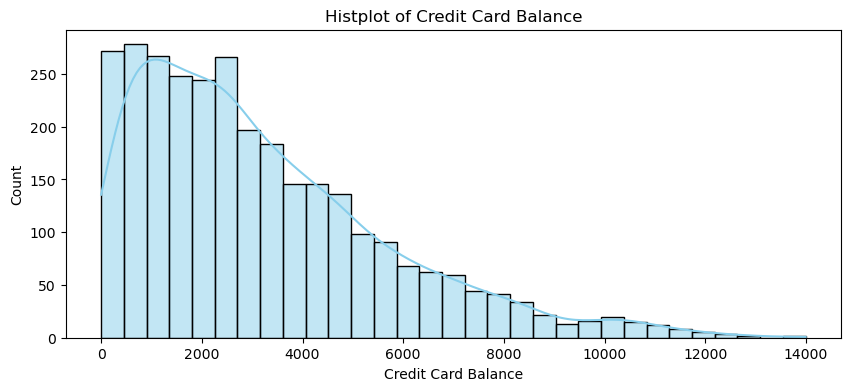

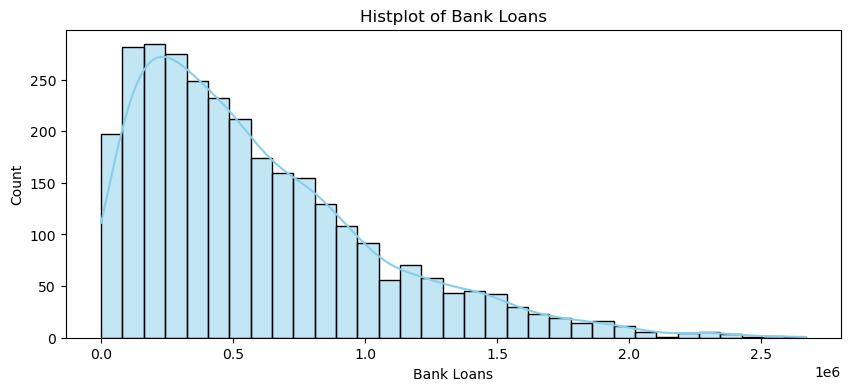

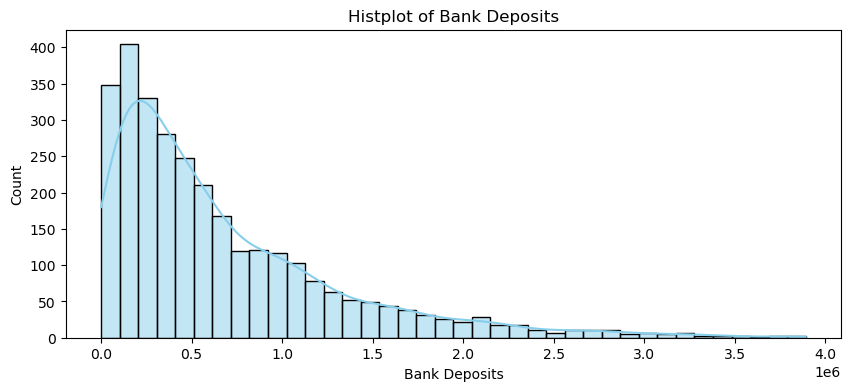

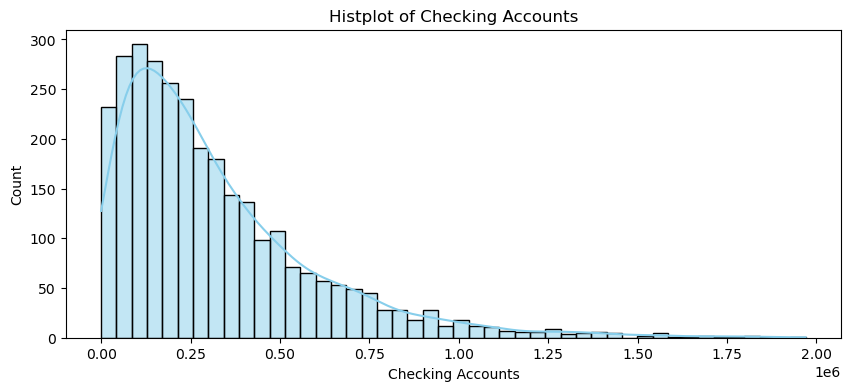

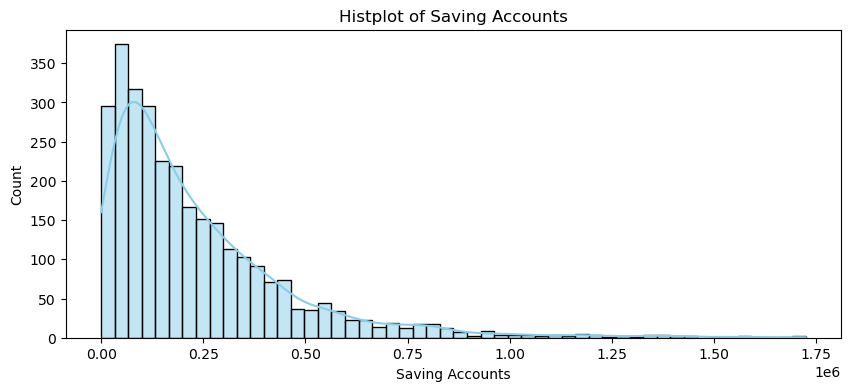

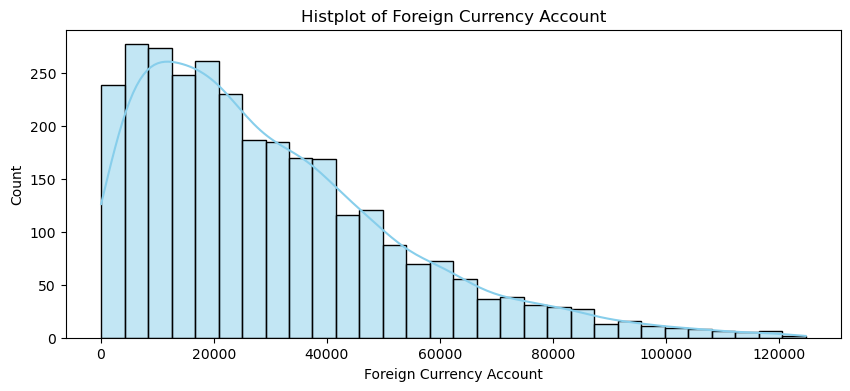

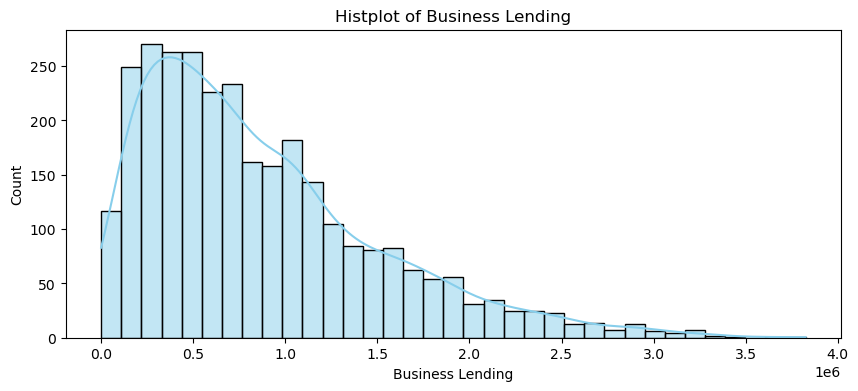

In [17]:
Numerical_cols=["Age","Estimated Income","Superannuation Savings","Credit Card Balance","Bank Loans","Bank Deposits","Checking Accounts","Saving Accounts","Foreign Currency Account","Business Lending"]
for col in Numerical_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(x=df[col], color='skyblue', kde =True)  
    plt.title(f"Histplot of {col}")
    plt.xlabel(col)
    plt.show()

In [18]:
## Univariate Analysis for some of the Numerical columns

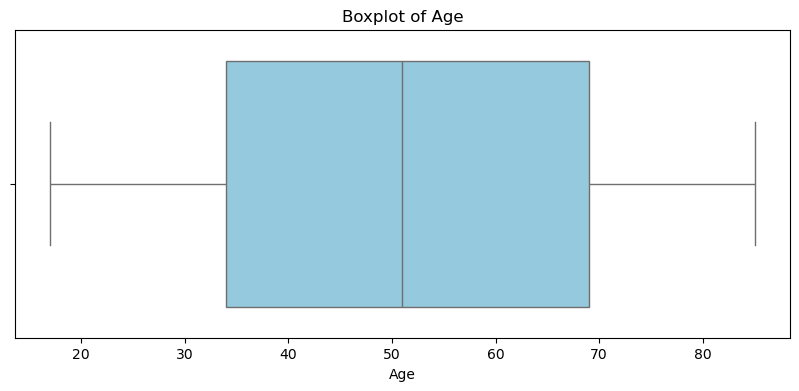

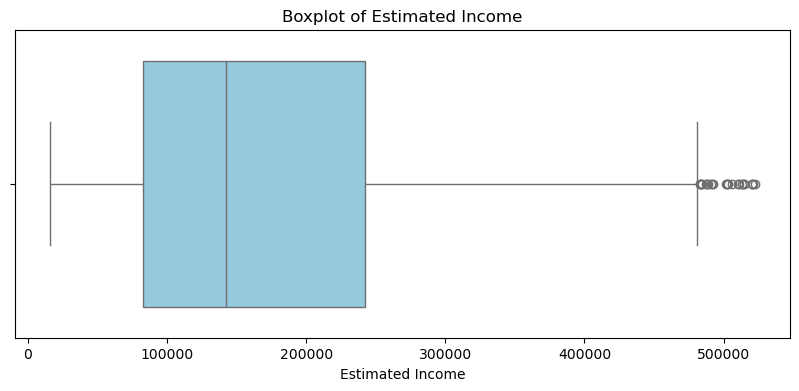

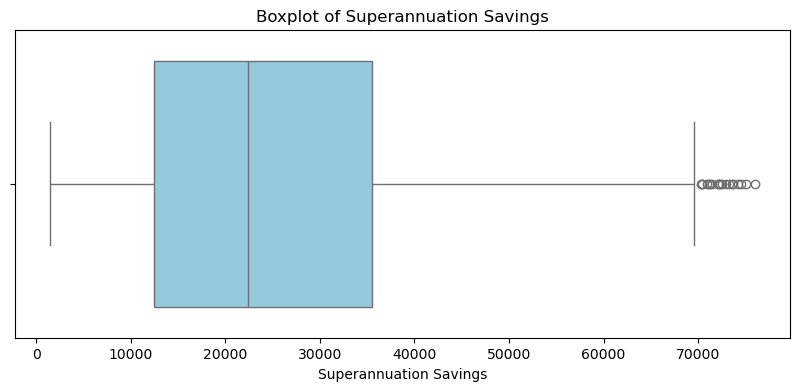

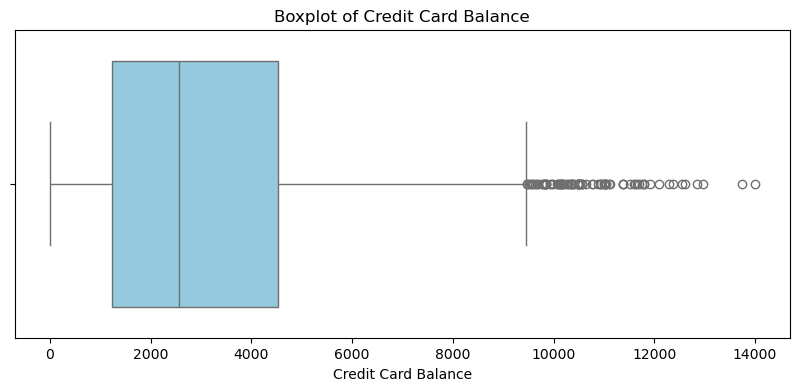

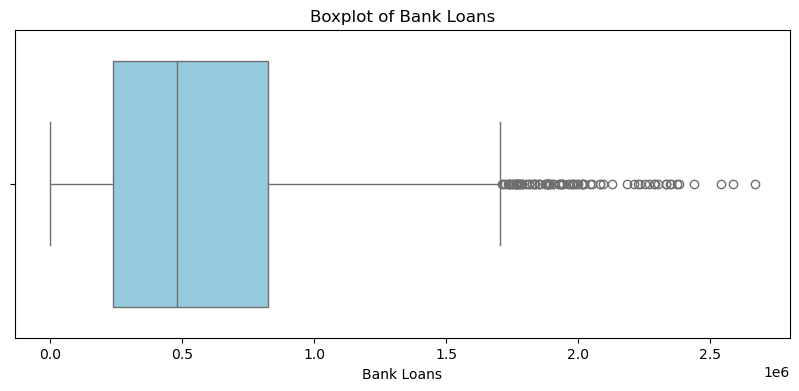

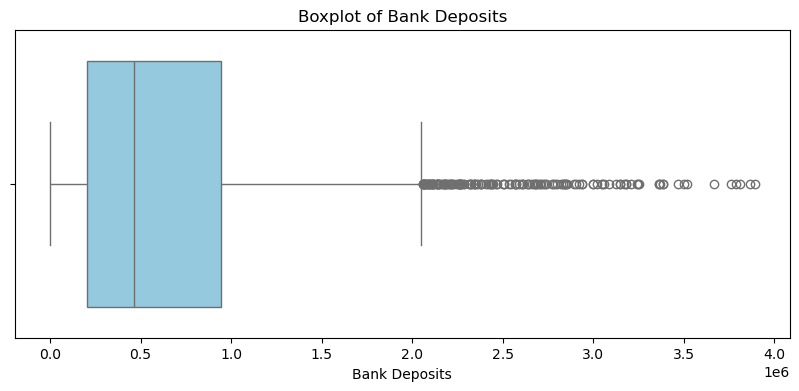

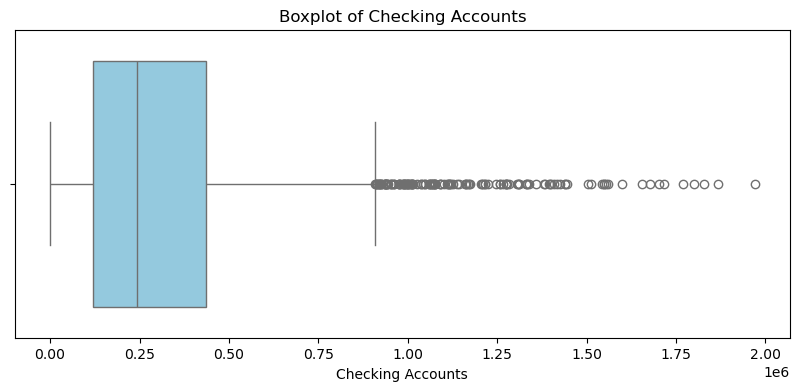

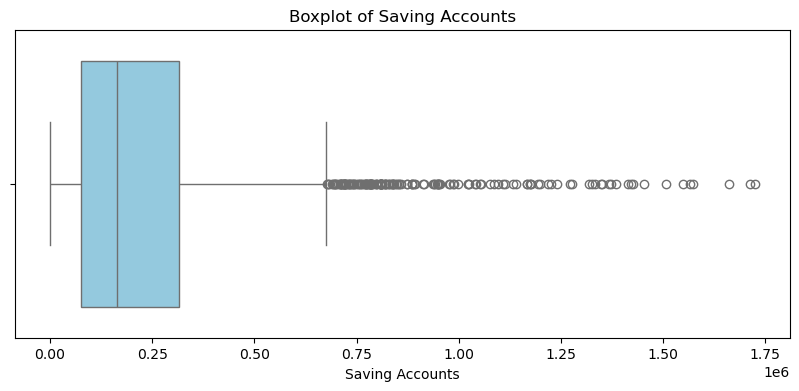

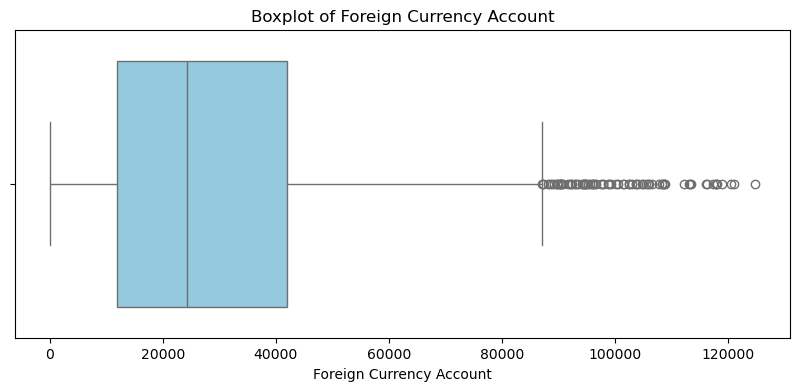

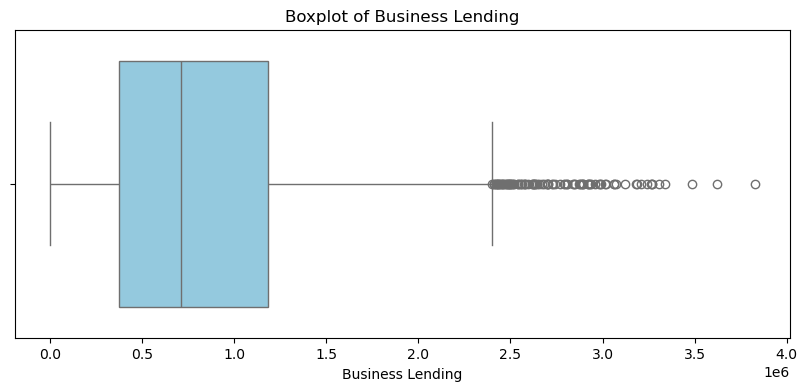

In [19]:
Numerical_cols = [
    "Age","Estimated Income","Superannuation Savings","Credit Card Balance",
    "Bank Loans","Bank Deposits","Checking Accounts","Saving Accounts",
    "Foreign Currency Account","Business Lending"
]

for col in Numerical_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [20]:
df["Total Loan"] = df["Credit Card Balance"] + df["Business Lending"] + df["Bank Loans"]
df

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band,Total Loan
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,607332.46,12249.96,1134475.30,1,2,1,1,1,Low,1911202.76
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,344635.16,61162.31,2000526.10,1,3,2,1,2,Mid,3273398.41
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,203054.35,79071.78,548137.58,1,3,3,2,3,Mid,1605422.16
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,234685.02,57513.65,1148402.29,0,4,4,1,4,High,1273802.35
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,128351.45,30012.14,1674412.12,0,3,1,2,5,Mid,2726493.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,09-10-2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,657849.62,12947.31,1238859.91,1,3,3,2,4,Mid,1463444.90
2996,IND40556,Billy Williamson,44,32837,05-02-2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,93195.61,23205.69,277171.07,1,2,3,2,5,Low,874712.13
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,35539.15,30291.81,502947.22,2,2,3,2,6,Low,1385793.09
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,56411.33,6413.14,1538368.60,3,1,3,2,7,Mid,1810572.24


In [21]:
loan_by_loyalty = df.groupby("Loyalty Classification")["Total Loan"].sum().reset_index()
print(loan_by_loyalty)


  Loyalty Classification    Total Loan
0                   Gold  8.451886e+08
1                   Jade  1.978886e+09
2               Platinum  4.422533e+08
3                 Silver  1.117639e+09


C:\Users\singh\AppData\Local\Temp\ipykernel_32104\2292535451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loyalty Classification", y="Total Loan", data=loan_by_loyalty, palette="pastel")


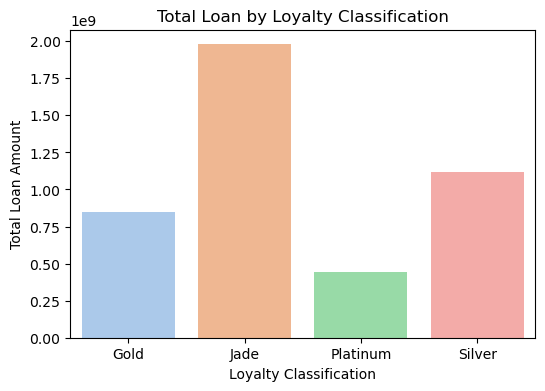

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x="Loyalty Classification", y="Total Loan", data=loan_by_loyalty, palette="pastel")
plt.title("Total Loan by Loyalty Classification")
plt.ylabel("Total Loan Amount")
plt.show()

In [23]:
loan_by_salaryBracket= df.groupby("Salary Bracket")["Total Loan"].sum().reset_index()
print(loan_by_salaryBracket)

KeyError: 'Salary Bracket'

In [24]:
df

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band,Total Loan
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,607332.46,12249.96,1134475.30,1,2,1,1,1,Low,1911202.76
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,344635.16,61162.31,2000526.10,1,3,2,1,2,Mid,3273398.41
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,203054.35,79071.78,548137.58,1,3,3,2,3,Mid,1605422.16
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,234685.02,57513.65,1148402.29,0,4,4,1,4,High,1273802.35
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,128351.45,30012.14,1674412.12,0,3,1,2,5,Mid,2726493.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,09-10-2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,657849.62,12947.31,1238859.91,1,3,3,2,4,Mid,1463444.90
2996,IND40556,Billy Williamson,44,32837,05-02-2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,93195.61,23205.69,277171.07,1,2,3,2,5,Low,874712.13
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,35539.15,30291.81,502947.22,2,2,3,2,6,Low,1385793.09
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,56411.33,6413.14,1538368.60,3,1,3,2,7,Mid,1810572.24


In [25]:
df.max()

ï»¿Client ID                        IND99980
Name                          Willie Wheeler
Age                                       85
Location ID                            43369
Joined Bank                       31-12-2021
Banking Contact                 Victor Ramos
Nationality                         European
Occupation                  Web Developer IV
Fee Structure                            Mid
Loyalty Classification                Silver
Estimated Income                   522330.26
Superannuation Savings               75963.9
Amount of Credit Cards                     3
Credit Card Balance                 13991.99
Bank Loans                        2667556.66
Bank Deposits                     3890598.08
Checking Accounts                 1969923.08
Saving Accounts                   1724118.36
Foreign Currency Account           124704.87
Business Lending                  3825961.94
Properties Owned                           3
Risk Weighting                             5
BRId      

In [26]:
df.corr(numeric_only=True)

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Total Loan
Age,1.000000,-0.007763,-0.001682,-0.023504,-0.004275,0.003431,0.004773,-0.010725,-0.002896,0.001205,-0.024935,0.000129,0.002229,-0.001198,-0.011292,-0.012727,-0.005061,0.002443
Location ID,-0.007763,1.000000,-0.014235,-0.002113,-0.010115,-0.015764,-0.019554,-0.032282,-0.030547,0.003305,-0.011679,0.000477,-0.035176,0.007579,0.013299,0.025892,0.000232,-0.009321
Estimated Income,-0.001682,-0.014235,1.000000,0.374802,-0.038399,0.298527,0.329926,0.260332,0.291412,0.261299,0.306999,0.328531,-0.008175,0.664726,0.018563,-0.036112,-0.009528,0.389114
Superannuation Savings,-0.023504,-0.002113,0.374802,1.000000,-0.039416,0.225562,0.241457,0.174084,0.198188,0.177132,0.228103,0.264919,0.024669,0.499640,-0.010602,0.001796,0.012754,0.301651
Amount of Credit Cards,-0.004275,-0.010115,-0.038399,-0.039416,1.000000,-0.021644,0.000067,-0.025614,-0.017295,-0.031438,-0.018598,-0.018311,0.002476,-0.027378,0.022977,0.003880,0.016495,-0.012633
Credit Card Balance,0.003431,-0.015764,0.298527,0.225562,-0.021644,1.000000,0.369509,0.383877,0.298672,0.284696,0.357720,0.351063,0.002354,0.399694,0.023785,-0.001298,-0.012262,0.425958
Bank Loans,0.004773,-0.019554,0.329926,0.241457,0.000067,0.369509,1.000000,0.373155,0.292082,0.268882,0.364391,0.417095,0.014687,0.421824,0.030316,-0.026132,0.000807,0.779511
Bank Deposits,-0.010725,-0.032282,0.260332,0.174084,-0.025614,0.383877,0.373155,1.000000,0.844278,0.754744,0.406347,0.441298,-0.013553,0.345412,0.021867,0.003385,-0.007987,0.488229
Checking Accounts,-0.002896,-0.030547,0.291412,0.198188,-0.017295,0.298672,0.292082,0.844278,1.000000,0.459509,0.312651,0.355904,-0.008914,0.373076,0.019216,0.006802,-0.010526,0.389369
Saving Accounts,0.001205,0.003305,0.261299,0.177132,-0.031438,0.284696,0.268882,0.754744,0.459509,1.000000,0.311465,0.307550,-0.025503,0.347358,0.004624,-0.018765,0.006358,0.344637


In [27]:
df.nunique()

ï»¿Client ID                2940
Name                        2913
Age                           69
Location ID                 2890
Joined Bank                 2579
Banking Contact               49
Nationality                    5
Occupation                   195
Fee Structure                  3
Loyalty Classification         4
Estimated Income            3000
Superannuation Savings      2997
Amount of Credit Cards         3
Credit Card Balance         2996
Bank Loans                  2973
Bank Deposits               2967
Checking Accounts           2967
Saving Accounts             2967
Foreign Currency Account    3000
Business Lending            2987
Properties Owned               4
Risk Weighting                 5
BRId                           4
GenderId                       2
IAId                          22
Income Band                    3
Total Loan                  3000
dtype: int64

In [28]:
df.groupby('Nationality').mean(numeric_only=True)

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Total Loan
Nationality,,,,,,,,,,,,,,,,,,
African,51.335227,21199.113636,177704.196932,25871.070568,1.420455,3259.753864,569144.536818,687868.296136,326085.714489,217584.409943,31781.144148,845587.975625,1.505682,2.289773,2.573864,1.511364,11.198864,1.417992e+06
American,51.386588,21124.441815,163767.324970,24754.120947,1.499014,3018.887081,603605.282899,661341.726509,316139.265444,237009.812623,28781.966765,832907.878323,1.473373,2.157791,2.522682,1.467456,10.025641,1.439532e+06
Asian,50.290451,21568.476127,170775.955782,25772.111260,1.436340,3120.690398,578497.850889,683437.562944,324133.778541,236910.293408,30420.178581,857107.447387,1.470822,2.259947,2.564987,1.498674,10.789125,1.438726e+06
Australian,50.645669,22246.838583,165291.317598,24753.842874,1.547244,3138.917008,606921.474252,665504.376181,318730.485039,222976.594764,27701.000551,894228.394528,1.590551,2.208661,2.625984,1.480315,10.000000,1.504289e+06
European,51.373568,21646.680672,174835.802170,25799.467762,1.455309,3265.120642,594053.258610,667658.878762,321047.167173,233002.148969,30169.429083,882947.761390,1.551566,2.281131,2.555386,1.524828,10.349121,1.480266e+06


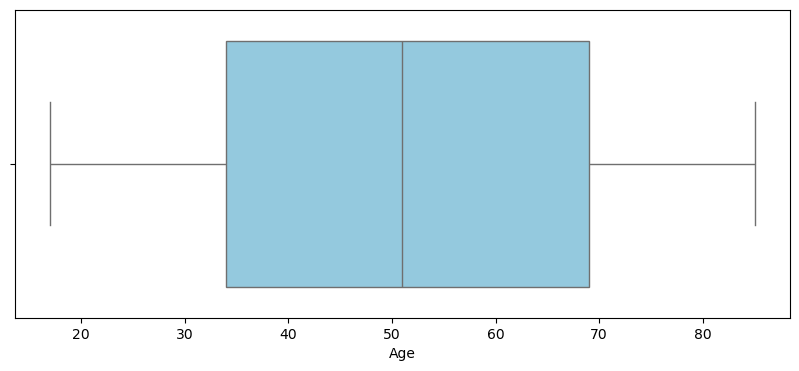

In [29]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df["Age"], color='skyblue')
plt.show()

In [30]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Total Loan
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333,1.461322e+06
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242,9.312684e+05
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,5.595170e+04
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000,7.704137e+05
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000,1.225764e+06
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000,1.958647e+06
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000,6.078679e+06


In [31]:
df.columns

Index(['ï»¿Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band',
       'Total Loan'],
      dtype='object')

In [32]:
df3=df[df['Risk Weighting'].isin([4,5])]['Total Loan'].sum()
df3

1045156042.1500001

In [58]:
df4=df['Total Loan'].sum()
df4
#df.info()
df3/df4

0.23840420294442566

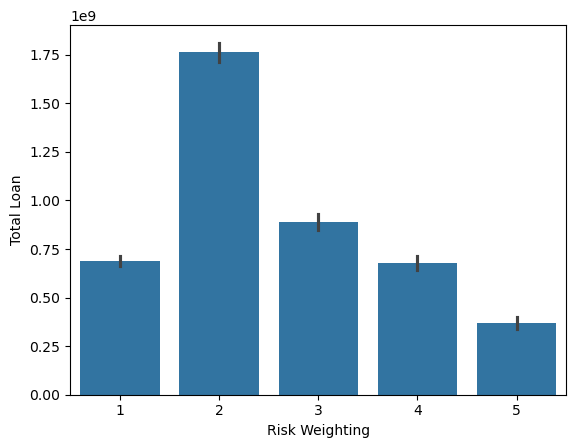

In [62]:
#plt.figure(figsize=10,4)
sns.barplot(x=df['Risk Weighting'], y=df['Total Loan'], estimator=sum)
plt.show()

In [35]:
df['Total Loan'].sum()

4383966512.51

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ï»¿Client ID              3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location ID               3000 non-null   int64   
 4   Joined Bank               3000 non-null   object  
 5   Banking Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee Structure             3000 non-null   object  
 9   Loyalty Classification    3000 non-null   object  
 10  Estimated Income          3000 non-null   float64 
 11  Superannuation Savings    3000 non-null   float64 
 12  Amount of Credit Cards    3000 non-null   int64   
 13  Credit Card Balance       3000 non-null   float6

In [64]:
df5=df[df['Risk Weighting'].isin([5])]['Total Loan'].sum()
df5

367825573.9

In [74]:
(df5/df4)*100

8.390245975884628

In [76]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Total Loan
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333,1.461322e+06
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242,9.312684e+05
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,5.595170e+04
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000,7.704137e+05
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000,1.225764e+06
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000,1.958647e+06
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000,6.078679e+06


In [82]:
df['Bank Loans'].max()/3

889185.5533333333